# Lesson 6 Assignment - Video Store Data Analysis

## Author - Mayuri Joshi

### Background
Consider the data collected by a hypothetical video store for 50 regular customers.

This data consists of a table which, for each customer, records the following attributes:
* Gender
* Income
* Age
* Rentals - Total number of video rentals in the past year
* Avg. per visit - Average number of video rentals per visit during the past year
* Incidentals - Whether the customer tends to buy incidental items such as refreshments when renting a video
* Genre - The customer's preferred movie genre

## Tasks
Use the provided Video_Store.csv file, perform each of the following data preparation tasks and answer the related questions:

a) Split the age attribute into bins, using a bin depth of 4.

b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again. 

c) Use z-score normalization to standardize the values of the Rentals attribute.

d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results. 

e) Create a list of your categorical values so that you can encode them. 

f) On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document <a href="https://library.startlearninglabs.uw.edu/DATASCI420/PDF/DATASCI%20420%20Basic%20Correlation%20Analysis.pdf">Basic Correlation Analysis</a> for more detail). *Can you observe any "significant" patterns among groups of two or more variables? Explain.*

g) Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). *What patterns do you see? Explain.*

**Note:** To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.

h) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.


**Hints:**

- Review basic statistics for different attributes by using the pandas functions you learned about

- Consider discretizing the Age attribute.

- Make sure numerical variables are on the same scale

In [1]:
# Data set contains 50 rows and 11 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Video_Store.csv"


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
# Read Video_store database
VideoStoreDataFrame = pd.read_csv(URL,header=0)

In [4]:
VideoStoreDataFrame.shape

(50, 8)

In [5]:
# Diaply first 5 rows of the dataframe
VideoStoreDataFrame.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,25,27,2.5,Yes,Action
1,2,F,54000,33,12,3.4,No,Drama
2,3,F,32000,20,42,1.6,No,Comedy
3,4,F,59000,70,16,4.2,Yes,Drama
4,5,M,37000,35,25,3.2,Yes,Action


In [6]:
# Display last 5 rows of dataframe
VideoStoreDataFrame.tail()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
45,46,F,57000,43,9,1.1,No,Drama
46,47,F,69000,35,22,2.8,Yes,Drama
47,48,F,52000,47,14,1.6,No,Drama
48,49,M,31000,25,42,3.4,Yes,Action
49,50,M,24000,20,33,4.7,No,Action


In [7]:
#Display information about columns
VideoStoreDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Cust ID          50 non-null int64
Gender           50 non-null object
Income           50 non-null int64
Age              50 non-null int64
Rentals          50 non-null int64
Avg Per Visit    50 non-null float64
Incidentals      50 non-null object
Genre            50 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 3.2+ KB


In [8]:
VideoStoreDataFrame.describe()

,Cust ID,Income,Age,Rentals,Avg Per Visit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,42300.000000,31.560000,26.240000,2.748000
std,14.57738,21409.753642,12.000272,10.027635,0.898125
min,1.00000,1000.000000,15.000000,9.000000,1.100000
25%,13.25000,26750.000000,22.000000,19.000000,2.125000
50%,25.50000,41000.000000,30.000000,25.000000,2.750000
75%,37.75000,56750.000000,37.500000,32.750000,3.375000
max,50.00000,89000.000000,70.000000,48.000000,4.700000


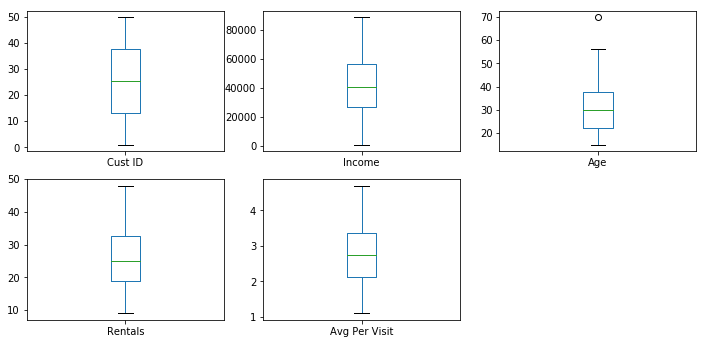

In [9]:
from matplotlib import pyplot
VideoStoreDataFrame.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(12,15))
pyplot.show()


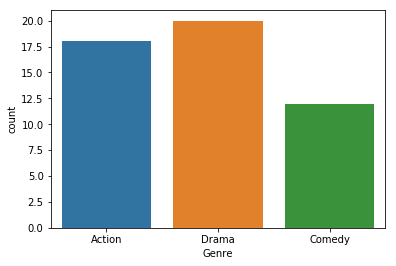

In [10]:
sns.countplot(x="Genre", data=VideoStoreDataFrame)

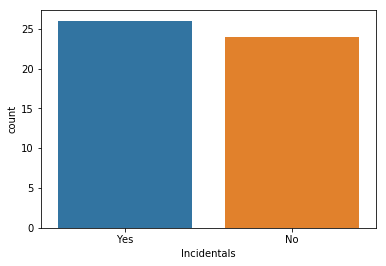

In [11]:
sns.countplot(x="Incidentals", data=VideoStoreDataFrame)

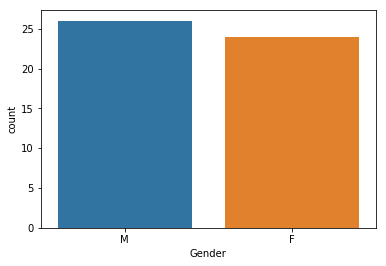

In [12]:
sns.countplot(x="Gender", data=VideoStoreDataFrame)

In [13]:
# Search for overall trends in the dataset
import pandas_profiling
pandas_profiling.ProfileReport(VideoStoreDataFrame)

C:\Users\mayur_000\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\mayur_000\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\mayur_000\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\mayur_000\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\mayur_000\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\mayur_000\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.ins

Number of variables,8
Number of observations,50
Total Missing (%),0.0%
Total size in memory,3.2 KiB
Average record size in memory,65.6 B
Numeric,5
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


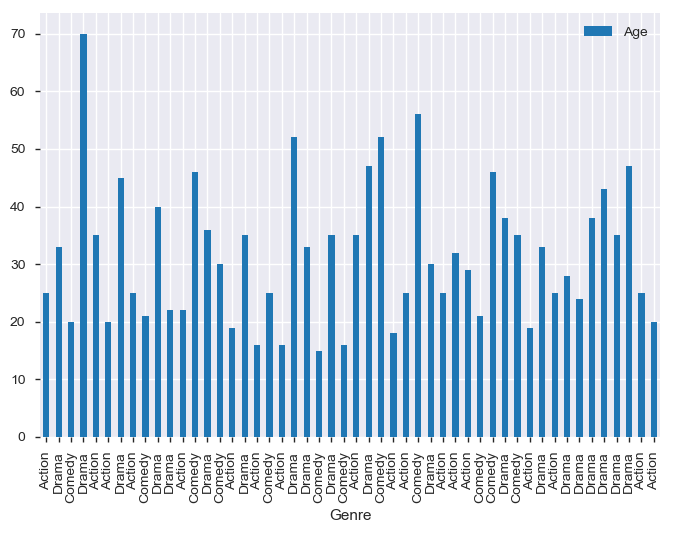

In [14]:
#ax = VideoStoreDataFrame.plot.bar(x='Genre', y='val', rot=0)
ax = VideoStoreDataFrame.plot.bar(x='Genre', y='Age')
#pd.value_counts('Genre').plot(kind='bar')

In [1]:
sns.stripplot(data = VideoStoreDataFrame, x='Age', y='Genre', jitter=.2)

NameError: name 'sns' is not defined

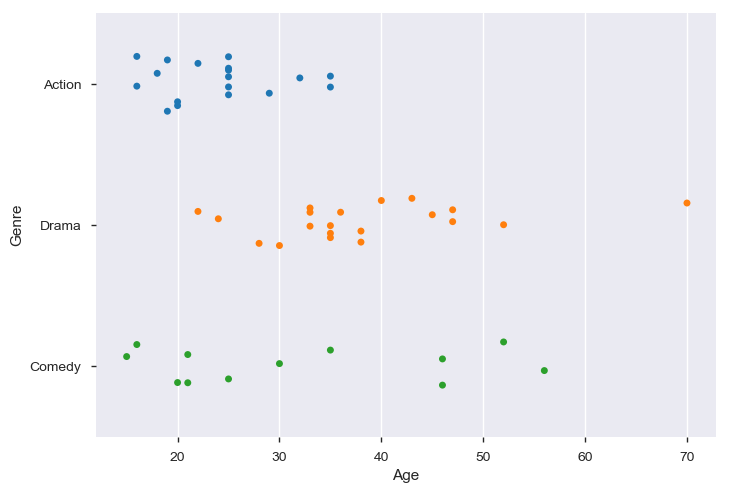

In [15]:
figsize=(16,16)
sns.stripplot(data = VideoStoreDataFrame, x='Age', y='Genre', jitter=.2)


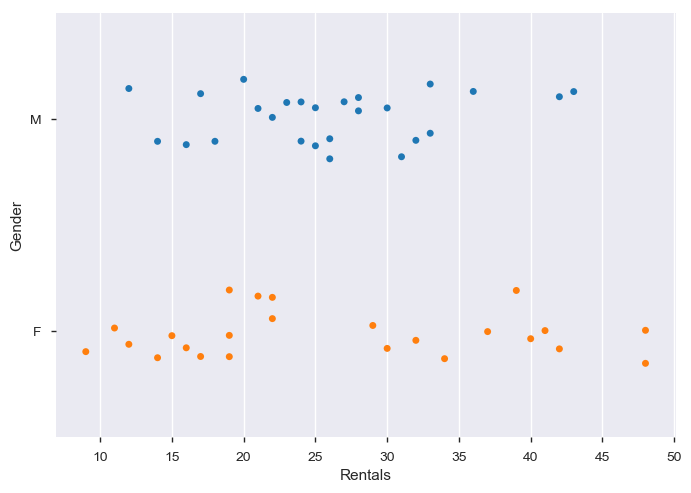

In [16]:
sns.stripplot(data = VideoStoreDataFrame, x='Rentals', y='Gender', jitter=.2)

In [17]:
VideoStoreDataFrame.dtypes

Cust ID            int64
Gender            object
Income             int64
Age                int64
Rentals            int64
Avg Per Visit    float64
Incidentals       object
Genre             object
dtype: object

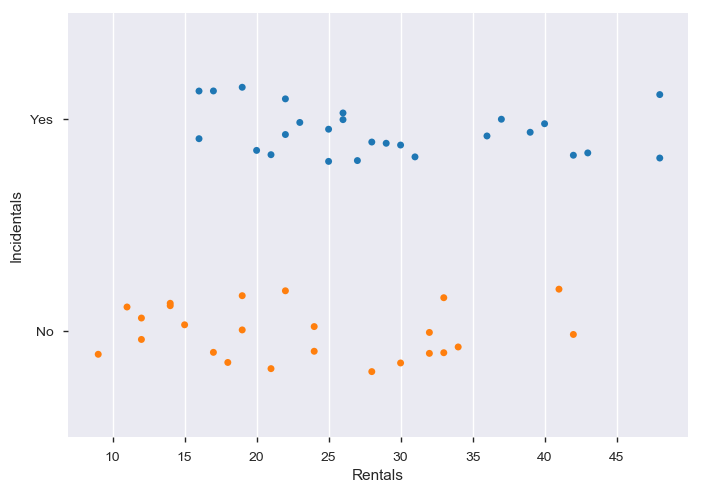

In [18]:
sns.stripplot(data = VideoStoreDataFrame, x='Rentals', y='Incidentals', jitter=.2)

Text(0.5,0,'Age')

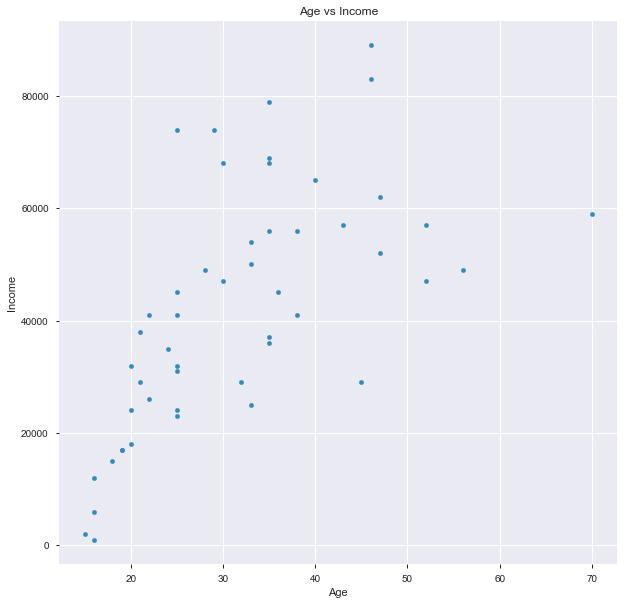

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(10, 10)).gca() # define axis
VideoStoreDataFrame.plot.scatter(x = 'Age', y = 'Income', ax = ax)
ax.set_title('Age vs Income') # Give the plot a main title
ax.set_ylabel('Income')# Set text for y axis
ax.set_xlabel('Age')

Text(0.5,0,'Age')

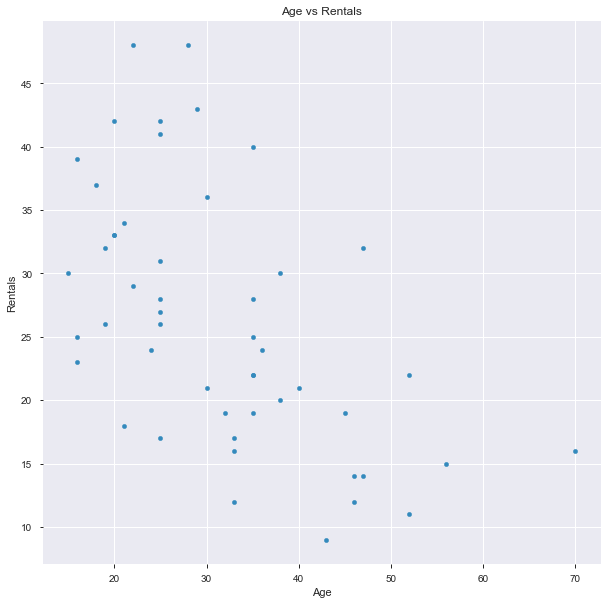

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(10, 10)).gca() # define axis
VideoStoreDataFrame.plot.scatter(x = 'Age', y = 'Rentals', ax = ax)
ax.set_title('Age vs Rentals') # Give the plot a main title
ax.set_ylabel('Rentals')# Set text for y axis
ax.set_xlabel('Age')

Text(0.5,0,'Age')

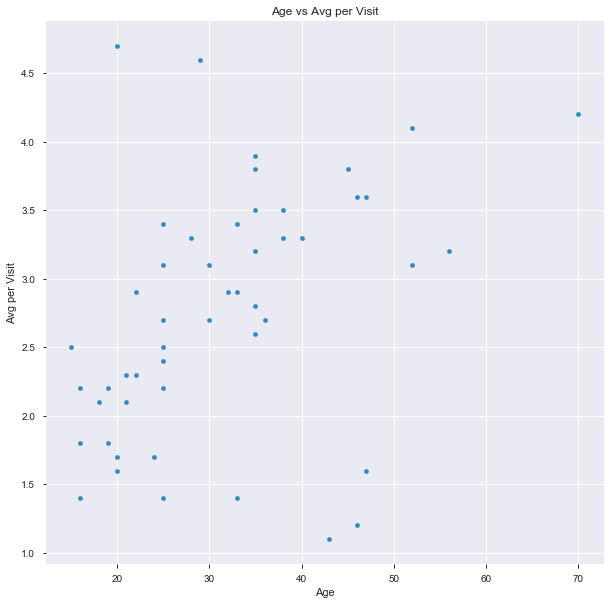

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(10, 10)).gca() # define axis
VideoStoreDataFrame.plot.scatter(x = 'Age', y = 'Avg Per Visit', ax = ax)
ax.set_title('Age vs Avg per Visit') # Give the plot a main title
ax.set_ylabel('Avg per Visit')# Set text for y axis
ax.set_xlabel('Age')

In [22]:
VideoStoreDataFrame.groupby('Incidentals').Age.agg(['count','min','max','mean'])

,count,min,max,mean
Incidentals,,,,
No,24,15,56,34.208333
Yes,26,16,70,29.115385


In [23]:
VideoStoreDataFrame.groupby('Gender').Rentals.mean()

Gender
F    26.5
M    26.0
Name: Rentals, dtype: float64

In [24]:
VideoStoreDataFrame.groupby('Genre').Rentals.mean()

Genre
Action    30.555556
Comedy    25.666667
Drama     22.700000
Name: Rentals, dtype: float64

In [25]:
VideoStoreDataFrame.groupby('Genre').Rentals.agg(['count','min','max','mean'])

,count,min,max,mean
Genre,,,,
Action,18,17,43,30.555556
Comedy,12,12,42,25.666667
Drama,20,9,48,22.700000


In [26]:
VideoStoreDataFrame.groupby('Genre').mean()

,Cust ID,Income,Age,Rentals,Avg Per Visit
Genre,,,,,
Action,25.222222,32055.555556,23.944444,30.555556,2.627778
Comedy,23.166667,45000.000000,31.916667,25.666667,2.641667
Drama,27.150000,49900.000000,38.200000,22.700000,2.920000


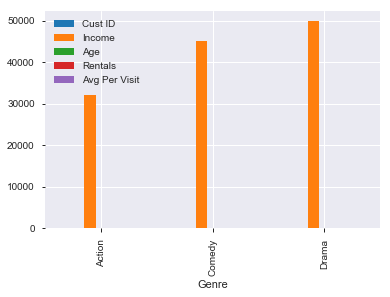

In [27]:
VideoStoreDataFrame.groupby('Genre').mean().plot(kind='bar')

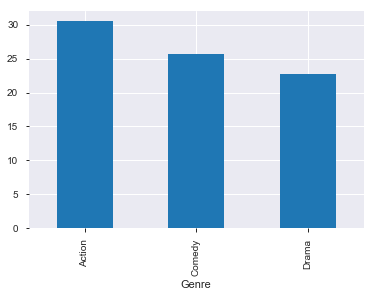

In [28]:
VideoStoreDataFrame.groupby('Genre').Rentals.mean().plot(kind='bar')

#### a) Split the age attribute into bins, using a bin depth of 4.

#### Binning the Continuous Variable into Bins
We would like to group them into the following bins: 
- Under 20
- 20 to 40
- 40 to 60
- Over 60

In [29]:
ages = VideoStoreDataFrame.loc[:,'Age']
#ages = VideoStoreDataFrame.iloc[:,3]

#print(ages)
bins = [15, 20, 40, 60, 100]
bin_names = ['Youth', 'YoungAdult', 'MiddleAge', 'Senior']


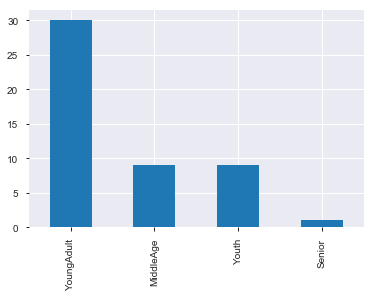

In [30]:
new_ages = pd.cut(ages, bins,labels=bin_names)

pd.value_counts(new_ages).plot(kind='bar')

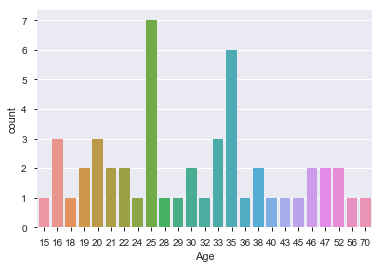

In [31]:
sns.countplot(x="Age", data=VideoStoreDataFrame)

In [32]:
VideoStoreDataFrame.duplicated().sum()


0

In [33]:
VideoStoreDataFrame.isnull().sum()

Cust ID          0
Gender           0
Income           0
Age              0
Rentals          0
Avg Per Visit    0
Incidentals      0
Genre            0
dtype: int64

In [34]:
new_ages.dtypes

category

In [35]:
VideoStoreDataFrame.loc[:,'Age'] = new_ages

In [36]:
VideoStoreDataFrame.head(10)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,YoungAdult,27,2.5,Yes,Action
1,2,F,54000,YoungAdult,12,3.4,No,Drama
2,3,F,32000,Youth,42,1.6,No,Comedy
3,4,F,59000,Senior,16,4.2,Yes,Drama
4,5,M,37000,YoungAdult,25,3.2,Yes,Action
5,6,M,18000,Youth,33,1.7,No,Action
6,7,F,29000,MiddleAge,19,3.8,No,Drama
7,8,M,74000,YoungAdult,31,2.4,Yes,Action
8,9,M,38000,YoungAdult,18,2.1,No,Comedy
9,10,F,65000,YoungAdult,21,3.3,No,Drama


#### b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again.

In [37]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [38]:
x= np.ravel(VideoStoreDataFrame['Income'])
X= pd.DataFrame(x)
data =  min_max_scaler.fit_transform(X)
VideoStoreDataFrame ['Normalized_Income']=data
#print(VideoStoreDataFrame ['Normalized_Income'])

In [39]:
VideoStoreDataFrame.head(15)

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normalized_Income
0,1,M,45000,YoungAdult,27,2.5,Yes,Action,0.500000
1,2,F,54000,YoungAdult,12,3.4,No,Drama,0.602273
2,3,F,32000,Youth,42,1.6,No,Comedy,0.352273
3,4,F,59000,Senior,16,4.2,Yes,Drama,0.659091
4,5,M,37000,YoungAdult,25,3.2,Yes,Action,0.409091
5,6,M,18000,Youth,33,1.7,No,Action,0.193182
6,7,F,29000,MiddleAge,19,3.8,No,Drama,0.318182
7,8,M,74000,YoungAdult,31,2.4,Yes,Action,0.829545
8,9,M,38000,YoungAdult,18,2.1,No,Comedy,0.420455
9,10,F,65000,YoungAdult,21,3.3,No,Drama,0.727273


#### Use z-score normalization to standardize the values of the Rentals attribute.

In [40]:
## We will use sklearn Z-score normalization method by calling standardization scale

In [41]:
from sklearn.preprocessing import *
x= np.ravel(VideoStoreDataFrame['Rentals'])
X= pd.DataFrame(x)
data =  preprocessing.scale(X)
#standardization_scale = StandardScaler().fit(X)
#z = standardization_scale.transform(X)

VideoStoreDataFrame ['Z-scoreNormalized_Rentals']=data

In [42]:
VideoStoreDataFrame.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normalized_Income,Z-scoreNormalized_Rentals
0,1,M,45000,YoungAdult,27,2.5,Yes,Action,0.500000,0.076560
1,2,F,54000,YoungAdult,12,3.4,No,Drama,0.602273,-1.434493
2,3,F,32000,Youth,42,1.6,No,Comedy,0.352273,1.587613
3,4,F,59000,Senior,16,4.2,Yes,Drama,0.659091,-1.031546
4,5,M,37000,YoungAdult,25,3.2,Yes,Action,0.409091,-0.124914


In [43]:
VideoStoreDataFrame.tail()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normalized_Income,Z-scoreNormalized_Rentals
45,46,F,57000,MiddleAge,9,1.1,No,Drama,0.636364,-1.736704
46,47,F,69000,YoungAdult,22,2.8,Yes,Drama,0.772727,-0.427124
47,48,F,52000,MiddleAge,14,1.6,No,Drama,0.579545,-1.233019
48,49,M,31000,YoungAdult,42,3.4,Yes,Action,0.340909,1.587613
49,50,M,24000,Youth,33,4.7,No,Action,0.261364,0.680981


#### Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results.

In [44]:
income = VideoStoreDataFrame.loc[:,'Income']
#ages = VideoStoreDataFrame.iloc[:,3]
#print(ages)
bins = [1000, 25000, 59000, 200000]
bin_names = ['Low', 'Mid', 'High']
#bin_names = [1,2,3,4]

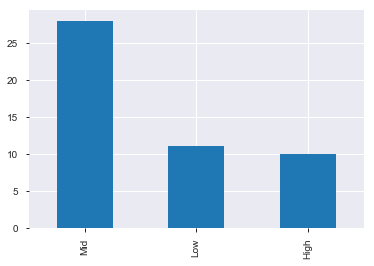

In [45]:
new_income = pd.cut(income, bins,labels=bin_names)

pd.value_counts(new_income).plot(kind='bar')

In [46]:
VideoStoreDataFrame.loc[:,'Income_Category'] = new_income

In [47]:
VideoStoreDataFrame.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category
0,1,M,45000,YoungAdult,27,2.5,Yes,Action,0.500000,0.076560,Mid
1,2,F,54000,YoungAdult,12,3.4,No,Drama,0.602273,-1.434493,Mid
2,3,F,32000,Youth,42,1.6,No,Comedy,0.352273,1.587613,Mid
3,4,F,59000,Senior,16,4.2,Yes,Drama,0.659091,-1.031546,Mid
4,5,M,37000,YoungAdult,25,3.2,Yes,Action,0.409091,-0.124914,Mid


#### Create a list of your categorical values so that you can encode them.

In [48]:
VideoStoreDataFrame.dtypes

Cust ID                         int64
Gender                         object
Income                          int64
Age                          category
Rentals                         int64
Avg Per Visit                 float64
Incidentals                    object
Genre                          object
Normalized_Income             float64
Z-scoreNormalized_Rentals     float64
Income_Category              category
dtype: object

####  We need to Covert following catagorical columns into number
- Gender
- Age
- Incidentals
- Genre
- Income_Category

In [49]:
VideoStoreDataFrame.shape

(50, 11)

In [50]:
# store object column names in a list
obj_cols = VideoStoreDataFrame.select_dtypes(include=["object"]).columns
obj_cols

Index(['Gender', 'Incidentals', 'Genre'], dtype='object')

In [51]:
# encode your dataframe
pd.get_dummies(VideoStoreDataFrame, columns=obj_cols)

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category,Gender_F,Gender_M,Incidentals_No,Incidentals_Yes,Genre_Action,Genre_Comedy,Genre_Drama
0,1,45000,YoungAdult,27,2.5,0.500000,0.076560,Mid,0,1,0,1,1,0,0
1,2,54000,YoungAdult,12,3.4,0.602273,-1.434493,Mid,1,0,1,0,0,0,1
2,3,32000,Youth,42,1.6,0.352273,1.587613,Mid,1,0,1,0,0,1,0
3,4,59000,Senior,16,4.2,0.659091,-1.031546,Mid,1,0,0,1,0,0,1
4,5,37000,YoungAdult,25,3.2,0.409091,-0.124914,Mid,0,1,0,1,1,0,0
5,6,18000,Youth,33,1.7,0.193182,0.680981,Low,0,1,1,0,1,0,0
6,7,29000,MiddleAge,19,3.8,0.318182,-0.729335,Mid,1,0,1,0,0,0,1
7,8,74000,YoungAdult,31,2.4,0.829545,0.479507,High,0,1,0,1,1,0,0
8,9,38000,YoungAdult,18,2.1,0.420455,-0.830072,Mid,0,1,1,0,0,1,0
9,10,65000,YoungAdult,21,3.3,0.727273,-0.527861,High,1,0,1,0,0,0,1


In [52]:
ModifiedVideoStoreDataFrame = pd.get_dummies(VideoStoreDataFrame, columns=obj_cols,drop_first=True)

In [53]:
ModifiedVideoStoreDataFrame.head(10)

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category,Gender_M,Incidentals_Yes,Genre_Comedy,Genre_Drama
0,1,45000,YoungAdult,27,2.5,0.500000,0.076560,Mid,1,1,0,0
1,2,54000,YoungAdult,12,3.4,0.602273,-1.434493,Mid,0,0,0,1
2,3,32000,Youth,42,1.6,0.352273,1.587613,Mid,0,0,1,0
3,4,59000,Senior,16,4.2,0.659091,-1.031546,Mid,0,1,0,1
4,5,37000,YoungAdult,25,3.2,0.409091,-0.124914,Mid,1,1,0,0
5,6,18000,Youth,33,1.7,0.193182,0.680981,Low,1,0,0,0
6,7,29000,MiddleAge,19,3.8,0.318182,-0.729335,Mid,0,0,0,1
7,8,74000,YoungAdult,31,2.4,0.829545,0.479507,High,1,1,0,0
8,9,38000,YoungAdult,18,2.1,0.420455,-0.830072,Mid,1,0,1,0
9,10,65000,YoungAdult,21,3.3,0.727273,-0.527861,High,0,0,0,1


In [54]:
VideoStoreDataFrame.shape

(50, 11)

In [55]:
ModifiedVideoStoreDataFrame.shape

(50, 12)

In [56]:
ModifiedVideoStoreDataFrame.dtypes

Cust ID                         int64
Income                          int64
Age                          category
Rentals                         int64
Avg Per Visit                 float64
Normalized_Income             float64
Z-scoreNormalized_Rentals     float64
Income_Category              category
Gender_M                        uint8
Incidentals_Yes                 uint8
Genre_Comedy                    uint8
Genre_Drama                     uint8
dtype: object

In [57]:
### Method 2 for converting string to Numeric

In [58]:
ModifiedVideoStoreDataFrame.head()

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category,Gender_M,Incidentals_Yes,Genre_Comedy,Genre_Drama
0,1,45000,YoungAdult,27,2.5,0.500000,0.076560,Mid,1,1,0,0
1,2,54000,YoungAdult,12,3.4,0.602273,-1.434493,Mid,0,0,0,1
2,3,32000,Youth,42,1.6,0.352273,1.587613,Mid,0,0,1,0
3,4,59000,Senior,16,4.2,0.659091,-1.031546,Mid,0,1,0,1
4,5,37000,YoungAdult,25,3.2,0.409091,-0.124914,Mid,1,1,0,0


In [59]:
ModifiedVideoStoreDataFrame.dtypes

Cust ID                         int64
Income                          int64
Age                          category
Rentals                         int64
Avg Per Visit                 float64
Normalized_Income             float64
Z-scoreNormalized_Rentals     float64
Income_Category              category
Gender_M                        uint8
Incidentals_Yes                 uint8
Genre_Comedy                    uint8
Genre_Drama                     uint8
dtype: object

In [60]:
cat_columns = ModifiedVideoStoreDataFrame.select_dtypes(['category']).columns
cat_columns

Index(['Age', 'Income_Category'], dtype='object')

In [61]:

ModifiedVideoStoreDataFrame[cat_columns] = ModifiedVideoStoreDataFrame[cat_columns].apply(lambda x: x.cat.codes)
ModifiedVideoStoreDataFrame.head(10)


,Cust ID,Income,Age,Rentals,Avg Per Visit,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category,Gender_M,Incidentals_Yes,Genre_Comedy,Genre_Drama
0,1,45000,1,27,2.5,0.500000,0.076560,1,1,1,0,0
1,2,54000,1,12,3.4,0.602273,-1.434493,1,0,0,0,1
2,3,32000,0,42,1.6,0.352273,1.587613,1,0,0,1,0
3,4,59000,3,16,4.2,0.659091,-1.031546,1,0,1,0,1
4,5,37000,1,25,3.2,0.409091,-0.124914,1,1,1,0,0
5,6,18000,0,33,1.7,0.193182,0.680981,0,1,0,0,0
6,7,29000,2,19,3.8,0.318182,-0.729335,1,0,0,0,1
7,8,74000,1,31,2.4,0.829545,0.479507,2,1,1,0,0
8,9,38000,1,18,2.1,0.420455,-0.830072,1,1,0,1,0
9,10,65000,1,21,3.3,0.727273,-0.527861,2,0,0,0,1


In [62]:
ModifiedVideoStoreDataFrame.dtypes

Cust ID                        int64
Income                         int64
Age                             int8
Rentals                        int64
Avg Per Visit                float64
Normalized_Income            float64
Z-scoreNormalized_Rentals    float64
Income_Category                 int8
Gender_M                       uint8
Incidentals_Yes                uint8
Genre_Comedy                   uint8
Genre_Drama                    uint8
dtype: object

In [63]:
# We have converted all Columns into Numeric 

In [64]:
ModifiedVideoStoreDataFrame.isnull().sum()

Cust ID                      0
Income                       0
Age                          0
Rentals                      0
Avg Per Visit                0
Normalized_Income            0
Z-scoreNormalized_Rentals    0
Income_Category              0
Gender_M                     0
Incidentals_Yes              0
Genre_Comedy                 0
Genre_Drama                  0
dtype: int64

##### Use correlation matrix using a heatmap

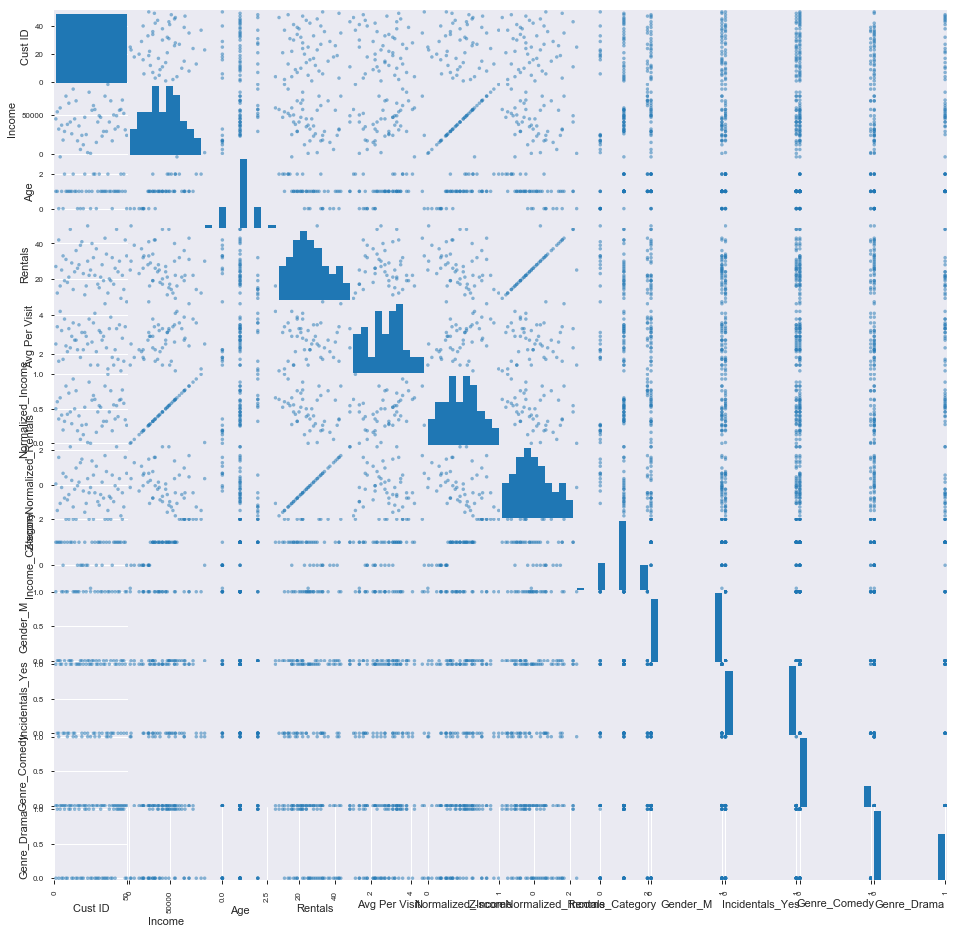

In [65]:
## Scatter Matrix
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(ModifiedVideoStoreDataFrame,figsize=(16,16))
plt.show()

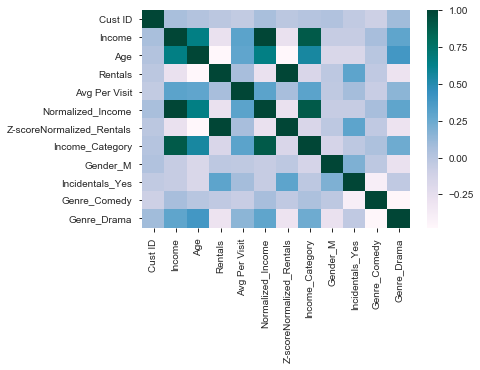

In [66]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = ModifiedVideoStoreDataFrame.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="PuBuGn")

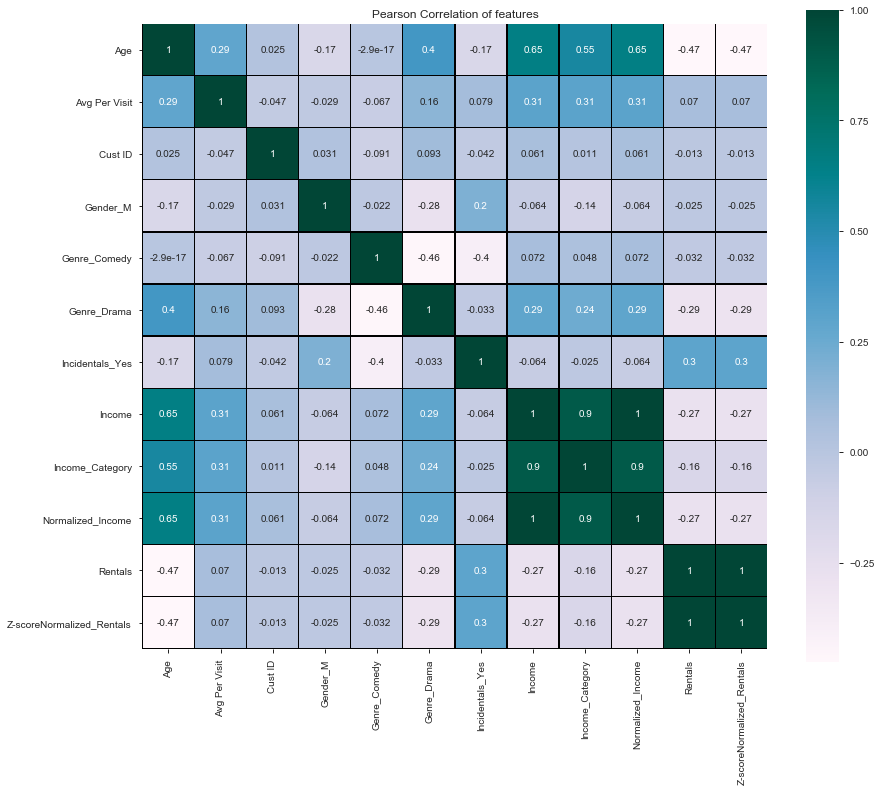

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in ModifiedVideoStoreDataFrame.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = ModifiedVideoStoreDataFrame.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = ModifiedVideoStoreDataFrame[num_list]
f, ax = plt.subplots(figsize=(14, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

### From above corelation matrix and cooffiecent  we can observe following
-  age and rental are positively corelated (0.51)
-  Age and income are positively corelated (0.65)
-  Age and Genre_drama are positively corelated (0.4)
-  Income and Avg per visits are positively corelated(0.31)
-  Rental and income are negatively corelated (-0.27)
-  Rentals and Incidentals_yes are positively corelated (0.31)
-  Age and Incidentals are positively related(0.33)

Text(0.5,0,'Age')

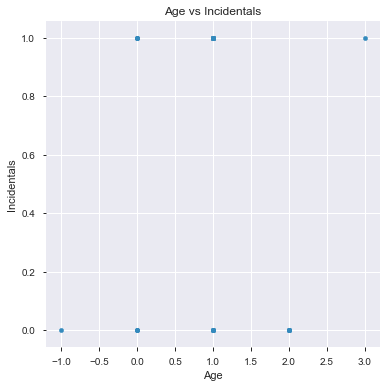

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 6)).gca() # define axis
ModifiedVideoStoreDataFrame.plot.scatter(x = 'Age', y = 'Incidentals_Yes', ax = ax)
ax.set_title('Age vs Incidentals') # Give the plot a main title
ax.set_ylabel('Incidentals')# Set text for y axis
ax.set_xlabel('Age')

Text(0.5,0,'Age')

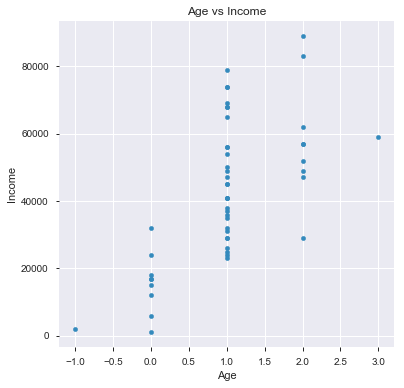

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 6)).gca() # define axis
ModifiedVideoStoreDataFrame.plot.scatter(x = 'Age', y = 'Income', ax = ax)
ax.set_title('Age vs Income') # Give the plot a main title
ax.set_ylabel('Income')# Set text for y axis
ax.set_xlabel('Age')

##### Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). What patterns do you see? Explain.

In [70]:
HighRentalCustomers = ModifiedVideoStoreDataFrame[ModifiedVideoStoreDataFrame['Rentals'] >= 30]

In [71]:
HighRentalCustomers

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category,Gender_M,Incidentals_Yes,Genre_Comedy,Genre_Drama
2,3,32000,0,42,1.6,0.352273,1.587613,1,0,0,1,0
5,6,18000,0,33,1.7,0.193182,0.680981,0,1,0,0,0
7,8,74000,1,31,2.4,0.829545,0.479507,2,1,1,0,0
10,11,41000,1,48,2.3,0.454545,2.192034,1,0,1,0,1
14,15,68000,1,36,2.7,0.761364,0.983192,2,1,1,1,0
17,18,6000,0,39,1.8,0.056818,1.285402,0,0,1,0,0
18,19,24000,1,41,3.1,0.261364,1.486876,0,0,0,1,0
22,23,2000,-1,30,2.5,0.011364,0.378771,0,0,0,1,0
25,26,56000,1,40,2.6,0.625000,1.386139,1,0,1,0,0
26,27,62000,2,32,3.6,0.693182,0.580244,2,0,0,0,1


In [72]:
ModifiedVideoStoreDataFrame.loc[ModifiedVideoStoreDataFrame['Rentals'] >= 30,'Incidentals_Yes'].count()

18

In [73]:
ModifiedVideoStoreDataFrame.loc[ModifiedVideoStoreDataFrame['Rentals'] >= 30,'Incidentals_Yes']

2     0
5     0
7     1
10    1
14    1
17    1
18    0
22    0
25    1
26    0
28    1
34    1
35    0
39    0
42    1
44    1
48    1
49    0
Name: Incidentals_Yes, dtype: uint8

In [74]:
HighRentalCustomers.describe()

,Cust ID,Income,Age,Rentals,Avg Per Visit,Normalized_Income,Z-scoreNormalized_Rentals,Income_Category,Gender_M,Incidentals_Yes,Genre_Comedy,Genre_Drama
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,26.833333,37666.666667,0.611111,37.277778,2.777778,0.416667,1.111911,0.833333,0.444444,0.555556,0.277778,0.222222
std,15.049917,23126.251953,0.697802,5.849138,0.927080,0.262798,0.589224,0.785905,0.511310,0.511310,0.460889,0.427793
min,3.000000,2000.000000,-1.000000,30.000000,1.600000,0.011364,0.378771,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,19500.000000,0.000000,32.250000,2.150000,0.210227,0.605429,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.500000,31500.000000,1.000000,36.500000,2.550000,0.346591,1.033560,1.000000,0.000000,1.000000,0.000000,0.000000
75%,39.000000,56000.000000,1.000000,41.750000,3.375000,0.625000,1.562429,1.000000,1.000000,1.000000,0.750000,0.000000
max,50.000000,74000.000000,2.000000,48.000000,4.700000,0.829545,2.192034,2.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
HighRentalCustomers['Rentals'].describe()

count    18.000000
mean     37.277778
std       5.849138
min      30.000000
25%      32.250000
50%      36.500000
75%      41.750000
max      48.000000
Name: Rentals, dtype: float64

#### We can have following observations
- there are 18 rows present whose rentals are > = 30 
- Maximum rentals = 48
- Minimum rentals 30
- Mean rentals 37.2


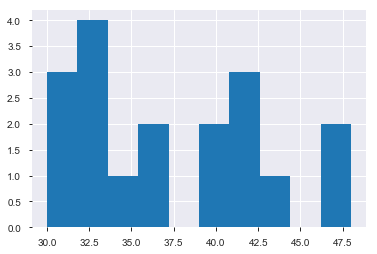

In [76]:
HighRentalCustomers['Rentals'].hist()

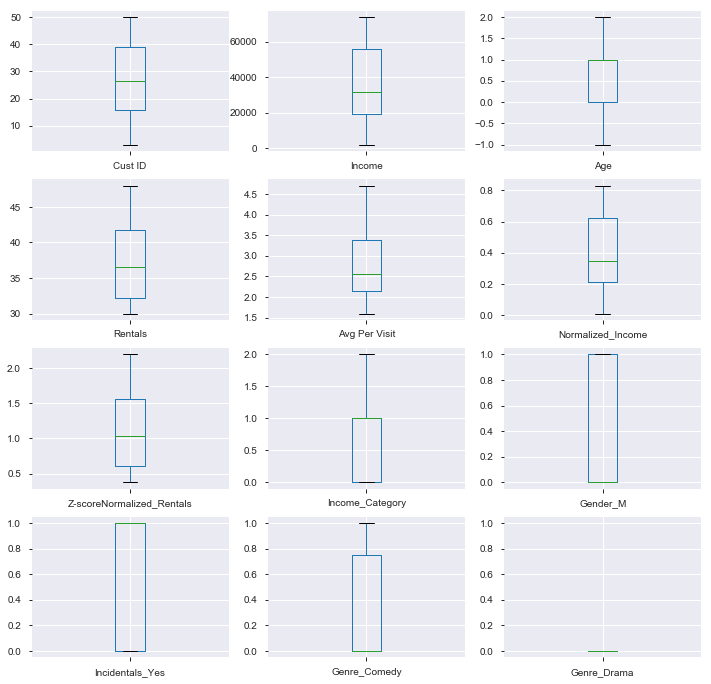

In [77]:
from matplotlib import pyplot

HighRentalCustomers.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(12,15))
pyplot.show()

##### Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.

In [78]:
HighRentalCustomers[HighRentalCustomers['Age'] == 2].Rentals.mean()

32.0

In [79]:
HighRentalCustomers[HighRentalCustomers['Age'] == 0].Rentals.mean()

36.0

In [80]:
HighRentalCustomers[HighRentalCustomers['Age'] == 1].Rentals.mean()

39.3

In [81]:
HighRentalCustomers[HighRentalCustomers['Age'] == -1].Rentals.mean()

30.0

In [82]:
VideoStoreDataFrame.groupby('Genre').Rentals.agg(['count','min','max','mean'])

,count,min,max,mean
Genre,,,,
Action,18,17,43,30.555556
Comedy,12,12,42,25.666667
Drama,20,9,48,22.700000


In [83]:
HighRentalCustomers[HighRentalCustomers['Incidentals_Yes'] == 1].Rentals.agg(['count','min','max','mean'])

count    10.0
min      30.0
max      48.0
mean     39.4
Name: Rentals, dtype: float64

##### From All analysis we can say
- Customers with age 20-40, youthAdult should be targeted, they rent Action movies and purchase incidentals maximum times
- Action Movies should be kept more, they are rented maximum times
- Customers with high income rent Dram genre movies most of the time
